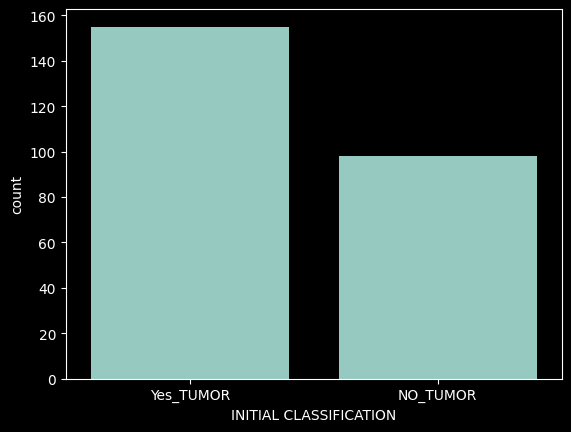

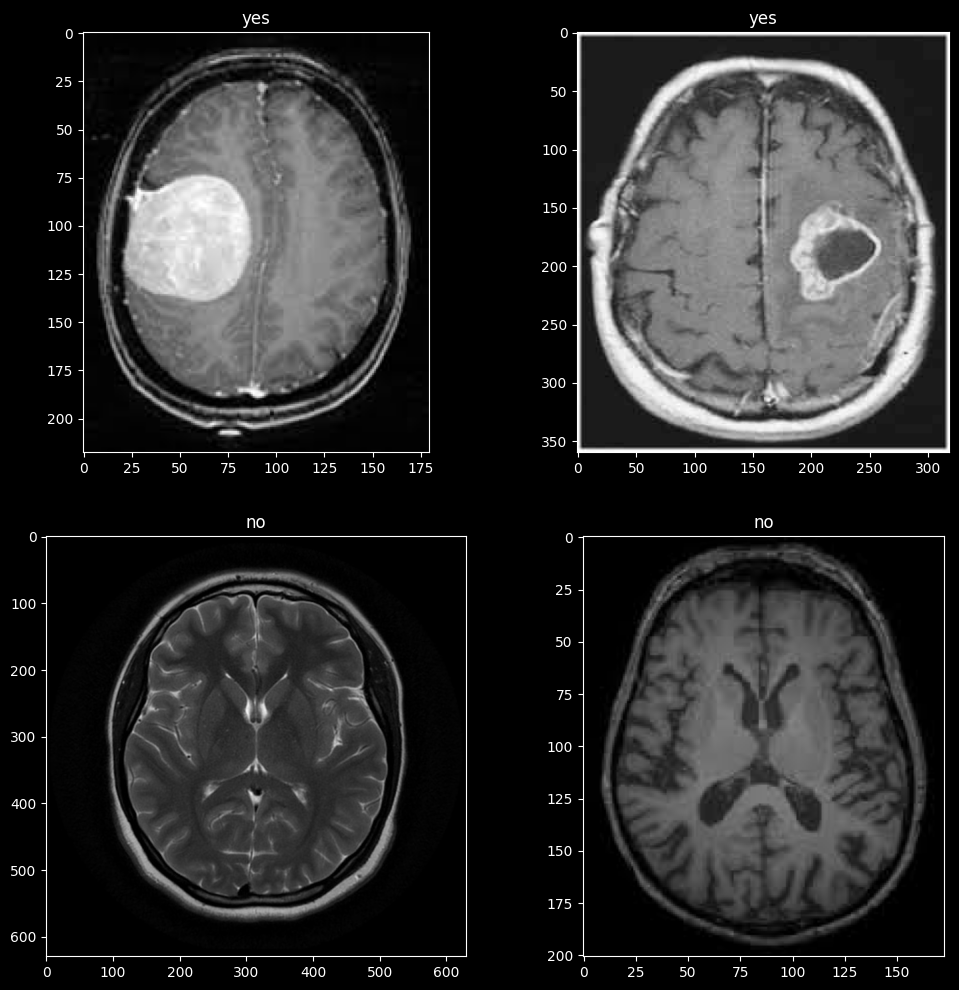

data shape is: (139, 128, 128, 3)
labels shape is: (139, 1)
1.0
0.0
shape of our training data: (97, 128, 128, 3)
shape of our training labels: (97, 1)
shape of our test data: (42, 128, 128, 3)
shape of our test labels: (42, 1)


c:\Users\alamp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,340,033 (8.93 MB)

 Trainable params: 2,340,033 (8.93 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
1/1 - 4s - 4s/step - accuracy: 0.5361 - loss: 0.6906 - val_accuracy: 0.5000 - val_loss: 0.6915
Epoch 2/200
1/1 - 1s - 764ms/step - accuracy: 0.5670 - loss: 0.6900 - val_accuracy: 0.4762 - val_loss: 0.6915
Epoch 3/200
1/1 - 1s - 598ms/step - accuracy: 0.5361 - loss: 0.6896 - val_accuracy: 0.4524 - val_loss: 0.6917
Epoch 4/200
1/1 - 1s - 598ms/step - accuracy: 0.5876 - loss: 0.6870 - val_accuracy: 0.4048 - val_loss: 0.6918
Epoch 5/200
1/1 - 1s - 674ms/step - accuracy: 0.5361 - loss: 0.6881 - val_accuracy: 0.4286 - val_loss: 0.6920
Epoch 6/200
1/1 - 1s - 604ms/step - accuracy: 0.5773 - loss: 0.6850 - val_accuracy: 0.4286 - val_loss: 0.6922
Epoch 7/200
1/1 - 1s - 601ms/step - accuracy: 0.5567 - loss: 0.6860 - val_accuracy: 0.4286 - val_loss: 0.6924
Epoch 8/200
1/1 - 1s - 596ms/step - accuracy: 0.5464 - loss: 0.6870 - val_accuracy: 0.4286 - val_loss: 0.6926
Epoch 9/200
1/1 - 1s - 613ms/step - accuracy: 0.5670 - loss: 0.6849 - val_accuracy: 0.4286 - val_loss: 0.6928
Epoch 10/200


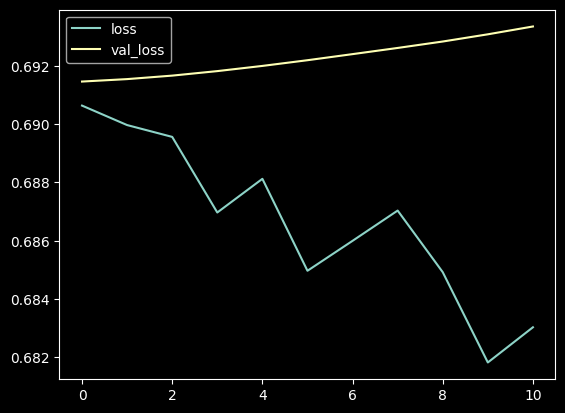

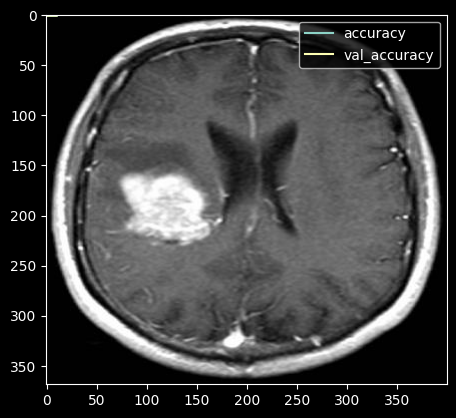

In [1]:
import numpy as np 
import pandas as pd
import os
import keras
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import img_to_array, load_img
from matplotlib.pyplot import imshow
plt.style.use('dark_background')
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Update the directory paths
no_dir = 'C:\\Users\\alamp\\OneDrive\\Desktop\\Deep_learning_classification_tumor_detection-main - Copy\\datasettumor\\no\\'
yes_dir = 'C:\\Users\\alamp\\OneDrive\\Desktop\\Deep_learning_classification_tumor_detection-main - Copy\\datasettumor\\yes\\'

# Histogram
img_to_array(load_img(os.path.join(no_dir, os.listdir(no_dir)[5]))).shape
dst = pd.DataFrame()
dst['INITIAL CLASSIFICATION'] = ['Yes_TUMOR'] * len(os.listdir(yes_dir)) + ['NO_TUMOR'] * len(os.listdir(no_dir))
sns.countplot(x='INITIAL CLASSIFICATION', data=dst)

# Image visualizations
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.imshow(load_img(os.path.join(yes_dir, os.listdir(yes_dir)[0])))
plt.title('yes')
plt.subplot(2, 2, 2)
plt.imshow(load_img(os.path.join(yes_dir, os.listdir(yes_dir)[1])))
plt.title('yes')
plt.subplot(2, 2, 3)
plt.imshow(load_img(os.path.join(no_dir, os.listdir(no_dir)[0])))
plt.title('no')
plt.subplot(2, 2, 4)
plt.imshow(load_img(os.path.join(no_dir, os.listdir(no_dir)[1])))
plt.title('no')
plt.show()

# Creating data arrays
data = []
paths = []
labels = []

# Tumor images
for r, d, f in os.walk(yes_dir):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        labels.append(1)

# Non-tumor images
paths = []
for r, d, f in os.walk(no_dir):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        labels.append(0)

data = np.array(data)
labels = np.array(labels)
labels = labels.reshape(data.shape[0], 1)
print('data shape is:', data.shape)
print('labels shape is:', labels.shape)

# Normalize data
data = data / 255.0
print(np.max(data))
print(np.min(data))

# Split data
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, shuffle=True, random_state=7)
print("shape of our training data:", x_train.shape)
print("shape of our training labels:", y_train.shape)
print("shape of our test data:", x_test.shape)
print("shape of our test labels:", y_test.shape)

# Define model
model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding='same', input_shape=[128, 128, 3]),
    layers.MaxPool2D(),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dropout(0.25),
    layers.Dense(units=256, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(epsilon=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

# Train model
history = model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test),
    batch_size=99, epochs=200, callbacks=[early_stopping], verbose=2)

# Plot training history
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss','val_loss']].plot()
history_frame.loc[:, ['accuracy','val_accuracy']].plot()

# Prediction example
img = Image.open('C:\\Users\\alamp\\OneDrive\\Desktop\\Deep_learning_classification_tumor_detection-main - Copy\\datasettumor\\yes\\Y11.jpg')
ax = np.array(img.resize((128,128)))
ax = ax.reshape(1,128,128,3)
res = model.predict_on_batch(ax)
imshow(img)
print('PREDICTION=', str(res[0]), '----close to 0 is NOT TUMOR, close to 1 is TUMOR')
